In [94]:
import pandas as pd
import numpy as np
import glob
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

**Part 1**

First, we will examine the complete set of lineage annotations individually computed for each week's data.

In [134]:
from compile_reports import read_group
ardf = read_group("*proposed.report.tsv")
ardf['date'] = pd.to_datetime(ardf.date,'%Y-%m-%d')
ardf

,parent,parent_nid,proposed_sublineage,proposed_sublineage_nid,proposed_sublineage_score,proposed_sublineage_size,parent_lineage_size,proposed_sublineage_percent,parent_parsimony,proposed_sublineage_parsimony,...,link,mutations,growth_score,aa_changes,sublineage_escape,parent_escape,net_escape_gain,taxlink,date,num
0,BA.2.3,node_1053136,auto.BA.2.3.0,node_1059655,38.779560,76,41576,0.00,28053,137,...,https://cov-spectrum.org/explore/World/AllSamp...,"C25810T>G23040A>C1471T,C2445T,T5406C,A6770G,C6...",1.089725,"ORF3a:L140F>S:R493Q>ORF1ab:T727I,ORF1ab:I1714T...",0.439575,0.643885,0.204311,https://taxonium.org/?backend=https://api.cov2...,2022-10-16,0
1,BA.2.12.1,node_1072218,auto.BA.2.12.1.0,node_1091636,47.166105,9505,145569,0.07,102168,7423,...,https://cov-spectrum.org/explore/World/AllSamp...,C21721T>T15009C>T22054G,1.392766,>>S:N164K,0.552213,0.552213,0.000000,https://taxonium.org/?backend=https://api.cov2...,2022-10-16,0
2,BA.4,node_873191,auto.BA.4.0,node_887066,54.522463,2050,66923,0.03,58653,1307,...,https://cov-spectrum.org/explore/World/AllSamp...,A23535G>C3165T,1.886539,S:N658S>ORF1ab:A967V,0.449881,0.449881,0.000000,https://taxonium.org/?backend=https://api.cov2...,2022-10-16,0
3,BA.2.75,node_1061908,auto.BA.2.75.0,node_1062550,21.728571,39,2344,0.02,4011,23,...,https://cov-spectrum.org/explore/World/AllSamp...,"C16468T,A22629C>C13170A",0.892143,"ORF1ab:P5402S,S:K356T>ORF1ab:T4302N",0.454705,0.559222,0.104516,https://taxonium.org/?backend=https://api.cov2...,2022-10-16,0
4,BA.4.1,node_873192,auto.BA.4.1.0,node_879137,94.088534,206,28506,0.01,24791,175,...,https://cov-spectrum.org/explore/World/AllSamp...,"T65A,A69C,G21570T>C14599T,A23535G>C8140T>G22599C",0.956847,S:G3V>S:N658S>>S:R346T,0.365970,0.449881,0.083911,https://taxonium.org/?backend=https://api.cov2...,2022-10-16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,auto.BA.5.2.21.5,node_1001169,auto.BA.5.2.21.5.0,node_1001188,11.940299,20,180,0.11,147,7,...,https://cov-spectrum.org/explore/World/AllSamp...,A29237G>A22893G,0.447214,N:M322V>S:K444R,0.370601,0.449881,0.079280,https://taxonium.org/?backend=https://api.cov2...,2022-11-20,5
87,auto.BA.5.2.20.5,node_1014052,auto.BA.5.2.20.5.0,node_1014059,10.173077,23,70,0.33,61,17,...,https://cov-spectrum.org/explore/World/AllSamp...,A22910G,0.435985,S:N450D,0.404525,0.449881,0.045356,https://taxonium.org/?backend=https://api.cov2...,2022-11-20,5
88,auto.BQ.1.28,node_970704,auto.BQ.1.28.0,node_970706,17.125926,34,57,0.60,35,12,...,https://cov-spectrum.org/explore/World/AllSamp...,C27707T>G25687T,0.832993,ORF7a:A105V>ORF3a:A99S,0.360439,0.360439,0.000000,https://taxonium.org/?backend=https://api.cov2...,2022-11-20,5
89,auto.BQ.1.2.3,node_968281,auto.BQ.1.2.3.0,node_968283,10.112360,30,57,0.53,50,18,...,https://cov-spectrum.org/explore/World/AllSamp...,C23013T,0.684653,S:A484V,0.360439,0.360439,0.000000,https://taxonium.org/?backend=https://api.cov2...,2022-11-20,5


In [157]:
ardf.proposed_sublineage.value_counts()

auto.BQ.1.8.0          2
auto.BQ.1.1.3.0        2
auto.BF.7.0            2
auto.BA.4.6.5.2        2
auto.CP.1.0            2
                      ..
auto.BE.1.5.0          1
auto.BE.3.1.0          1
auto.BA.5.1.10.1.0     1
auto.BA.5.1.1.1.0      1
auto.BA.5.2.1.5.0.0    1
Name: proposed_sublineage, Length: 691, dtype: int64

10 lineages were formally designated as Pango lineages independently during this period, and the name was made available for reuse the next week, resulting in some duplicate names. 

In [158]:
ardf[ardf.proposed_sublineage == 'auto.BQ.1.8.0']

,parent,parent_nid,proposed_sublineage,proposed_sublineage_nid,proposed_sublineage_score,proposed_sublineage_size,parent_lineage_size,proposed_sublineage_percent,parent_parsimony,proposed_sublineage_parsimony,...,link,mutations,growth_score,aa_changes,sublineage_escape,parent_escape,net_escape_gain,taxlink,date,num
100,BQ.1.8,node_965806,auto.BQ.1.8.0,node_965821,10.112360,30,134,0.22,82,15,...,https://cov-spectrum.org/explore/World/AllSamp...,"C12115T,C23625T",1.095445,S:A688V,0.360439,0.360439,0.0,https://taxonium.org/?backend=https://api.cov2...,2022-10-16,0
116,BQ.1.8,node_969425,auto.BQ.1.8.0,node_969432,12.565217,34,596,0.06,257,18,...,https://cov-spectrum.org/explore/World/AllSamp...,A21137G,1.166190,ORF1ab:K6958R,0.360439,0.360439,0.0,https://taxonium.org/?backend=https://api.cov2...,2022-10-31,2


As an example, during the week of 10-23-22, auto.BQ.1.8.0 from 10-16-22 was independently formally designated as BQ.1.8.2. The name was reused for the 10-31-22 analysis.  

In [135]:
ardf.date.value_counts()

2022-10-31    139
2022-10-16    136
2022-10-23    116
2022-11-06    110
2022-11-13    109
2022-11-20     91
Name: date, dtype: int64

Lineage proposals are relatively evenly distributed among the 6 weeks analyzed, with a bias towards earlier weeks as the transferred proposals are saturated and new proposals are based more purely on newly added sequences. 

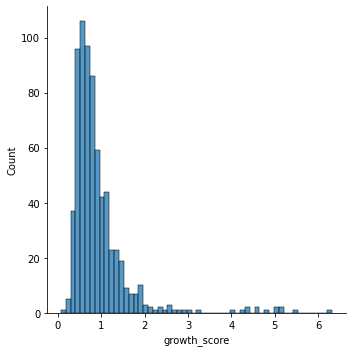

In [143]:
sns.displot(ardf.growth_score)

In [159]:
ardf.growth_score.describe()

count    701.000000
mean       0.925059
std        0.696979
min        0.066551
25%        0.554940
50%        0.745356
75%        1.058301
max        6.324555
Name: growth_score, dtype: float64

Growth scores are variable, with a mean slightly below one. Growth score is defined as the square root of the total number of samples divided by the number of weeks since the earliest sample in the lineage was collected- therefore, the average lineage is growing somewhat less than exponentially at the time of initial designation.

<AxesSubplot:ylabel='Frequency'>

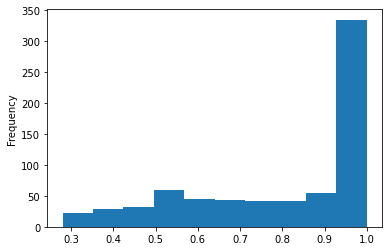

In [162]:
ardf['largest_region_percent'] = ardf.child_region_percents.apply(lambda x:float(x.split(",")[0]))
ardf.largest_region_percent.plot(kind='hist')

In [165]:
ardf.child_regions.value_counts(normalize=True)

USA                                                                                                    0.216833
England,United Kingdom                                                                                 0.084165
USA,England                                                                                            0.039943
England                                                                                                0.019971
USA,England,United Kingdom                                                                             0.018545
                                                                                                         ...   
USA,Northern Ireland,England,Switzerland,United Kingdom                                                0.001427
England,Denmark,USA,Scotland,Wales,Slovakia,Switzerland,United Kingdom,Northern Ireland,New Zealand    0.001427
England,USA,Denmark,Wales,United Kingdom,Switzerland,Scotland,Slovakia                                 0

The bulk of designated lineages were geographically unique. Geographic location is directly correlated to total geographic contribution to sequencing, so the bulk of new lineage designations are localized to the United States and to Northern Europe.

In [168]:
ardf.net_escape_gain.describe()

count    701.000000
mean       0.004618
std        0.021001
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.204311
Name: net_escape_gain, dtype: float64

In [175]:
ardf[ardf.net_escape_gain > 0]

,parent,parent_nid,proposed_sublineage,proposed_sublineage_nid,proposed_sublineage_score,proposed_sublineage_size,parent_lineage_size,proposed_sublineage_percent,parent_parsimony,proposed_sublineage_parsimony,...,mutations,growth_score,aa_changes,sublineage_escape,parent_escape,net_escape_gain,taxlink,date,num,largest_region_percent
0,BA.2.3,node_1053136,auto.BA.2.3.0,node_1059655,38.779560,76,41576,0.00,28053,137,...,"C25810T>G23040A>C1471T,C2445T,T5406C,A6770G,C6...",1.089725,"ORF3a:L140F>S:R493Q>ORF1ab:T727I,ORF1ab:I1714T...",0.439575,0.643885,0.204311,https://taxonium.org/?backend=https://api.cov2...,2022-10-16,0,0.83
3,BA.2.75,node_1061908,auto.BA.2.75.0,node_1062550,21.728571,39,2344,0.02,4011,23,...,"C16468T,A22629C>C13170A",0.892143,"ORF1ab:P5402S,S:K356T>ORF1ab:T4302N",0.454705,0.559222,0.104516,https://taxonium.org/?backend=https://api.cov2...,2022-10-16,0,0.69
4,BA.4.1,node_873192,auto.BA.4.1.0,node_879137,94.088534,206,28506,0.01,24791,175,...,"T65A,A69C,G21570T>C14599T,A23535G>C8140T>G22599C",0.956847,S:G3V>S:N658S>>S:R346T,0.365970,0.449881,0.083911,https://taxonium.org/?backend=https://api.cov2...,2022-10-16,0,0.83
53,BE.1.1,node_963581,auto.BE.1.1.0,node_964693,38.944785,46,13747,0.00,11926,27,...,"C25549T>A1301G>C16338T,A22910G>G4006A",0.847791,ORF3a:L53F>ORF1ab:T346A>S:N450D>,0.404525,0.449881,0.045356,https://taxonium.org/?backend=https://api.cov2...,2022-10-16,0,0.67
60,BF.26,node_1025173,auto.BF.26.0,node_1025797,40.449438,126,3107,0.04,2928,126,...,C15738T>G22599C,0.801784,>S:R346T,0.365970,0.449881,0.083911,https://taxonium.org/?backend=https://api.cov2...,2022-10-16,0,0.87
121,auto.BA.5.1.5.0,node_969395,auto.BA.5.1.5.0.0,node_969403,10.132530,31,162,0.19,106,30,...,G22599C,0.463980,S:R346T,0.365970,0.449881,0.083911,https://taxonium.org/?backend=https://api.cov2...,2022-10-16,0,0.58
128,auto.BA.5.2.16.0,node_991403,auto.BA.5.2.16.0.0,node_991409,16.055556,55,173,0.32,165,47,...,T22896C,0.674200,S:V445A,0.398319,0.449881,0.051562,https://taxonium.org/?backend=https://api.cov2...,2022-10-16,0,0.98
11,BA.5.2_no28330,node_1036570,auto.BA.5.2_no28330.1,node_1037131,55.670103,250,2602,0.10,2880,254,...,"T3571G,C5622T,A10348G>A22941G",0.752923,"ORF1ab:S1102R,ORF1ab:P1786L>S:N460S",0.439372,0.449881,0.010508,https://taxonium.org/?backend=https://api.cov2...,2022-10-23,1,0.74
51,BF.26,node_1029410,auto.BF.26.1,node_1029737,20.828571,27,3374,0.01,3178,16,...,A22600C>T3199C,1.039230,S:R346S>,0.365970,0.449881,0.083911,https://taxonium.org/?backend=https://api.cov2...,2022-10-23,1,0.89
70,BA.5.2.20,node_1001554,auto.BA.5.2.20.1,node_1002201,37.779070,57,3807,0.01,3597,41,...,"C25626T>T29726G>C811T,G22599C>C19596A",0.943729,>>S:R346T>,0.365970,0.449881,0.083911,https://taxonium.org/?backend=https://api.cov2...,2022-10-23,1,0.93


40 of the lineage proposals are predicted to have an improved immune escape score by the Bloom DMS escape calculator.

In [178]:
from scipy.stats import mannwhitneyu as mwu
mwu(ardf[ardf.net_escape_gain == 0].growth_score, ardf[ardf.net_escape_gain > 0].growth_score)

MannwhitneyuResult(statistic=13225.0, pvalue=0.9971130104487179)

However, these proposals exhibit no evidence of an early growth advantage due to this increased escape. This may be due to relative saturation of immune escape by different Omicron strains with respect to the vaccines the Bloom lab studied, where additional escape confers relatively little competitive advantage, or to a simple lack of statistical power to detect more subtle advantages.

In [179]:
mwu(ardf[ardf.aa_changes.apply(lambda x:x.count("S:")) == 0].growth_score, ardf[ardf.aa_changes.apply(lambda x:x.count("S:")) > 0].growth_score)

MannwhitneyuResult(statistic=40515.5, pvalue=1.0)

Similarly, proposals which include new spike protein changes relative to their parent lineage exhibit no evidence for altered behavior. We therefore chose not to filter on spike changes or immune escape scores for the compiled results below.

**Part 2**

The output file from compile_reports.py - "compiled_report.tsv", by default- contains the set of automated lineage annotations from the timeseries which conform to the following requirements:

1. The lineage must be a direct sublineage descendent of an annotated Pango lineage, and not another automated lineage designation. This simplifies reporting and lineage naming substantially. 
2. The lineage must have continuously grown over the weeks since designation- specifically, there must be a net gain of additional samples *exclusive to* that lineage collected each week. This removes automated lineage designations which were subsequently and substantially subdivided by the manual annotation of new Pango lineages. This also is likely to remove low-quality spurious lineages resulting from the accumulation of error-prone sequences, which should not grow in a normal pattern.
3. The lineage must have persisted for at least a week- that is, lineages from the most recent time point alone are excluded, as not enough information has been collected about their ability to persist and spread.
4. The lineage must pass all other filters described in the individual proposal pipeline automated-lineages-prototype/config.yaml.

In [148]:
rdf = pd.read_csv("compiled_report.tsv",sep='\t')
rdf

,parent,parent_nid,proposed_sublineage,proposed_sublineage_nid,proposed_sublineage_score,proposed_sublineage_size,parent_lineage_size,proposed_sublineage_percent,parent_parsimony,proposed_sublineage_parsimony,...,aa_changes,sublineage_escape,parent_escape,net_escape_gain,taxlink,date,num,active,growth,persistence
0,BA.2.3,node_1053136,auto.BA.2.3.0,node_1059655,38.779560,76,41576,0.00,28053,137,...,"ORF3a:L140F>S:R493Q>ORF1ab:T727I,ORF1ab:I1714T...",0.439575,0.643885,0.204311,https://taxonium.org/?backend=https://api.cov2...,2022-10-16,0,True,0.054054,6
1,BA.2.12.1,node_1072218,auto.BA.2.12.1.0,node_1091636,47.166105,9505,145569,0.07,102168,7423,...,>>S:N164K,0.552213,0.552213,0.000000,https://taxonium.org/?backend=https://api.cov2...,2022-10-16,0,True,0.000525,6
2,BA.2.75,node_1061908,auto.BA.2.75.0,node_1062550,21.728571,39,2344,0.02,4011,23,...,"ORF1ab:P5402S,S:K356T>ORF1ab:T4302N",0.454705,0.559222,0.104516,https://taxonium.org/?backend=https://api.cov2...,2022-10-16,0,True,0.043478,6
3,BN.1,node_1061999,auto.BN.1.0,node_1062008,46.532872,82,210,0.39,198,33,...,ORF1ab:S2103F>ORF1ab:G6837D,0.344229,0.344229,0.000000,https://taxonium.org/?backend=https://api.cov2...,2022-10-16,0,True,0.109756,6
4,BA.4.6,node_881617,auto.BA.4.6.0,node_885460,137.243463,708,18025,0.04,16872,689,...,ORF1ab:T6175I,0.365970,0.365970,0.000000,https://taxonium.org/?backend=https://api.cov2...,2022-10-16,0,True,0.006211,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,BF.5,node_1028175,auto.BF.5.4,node_1028749,24.083333,78,8998,0.01,8018,81,...,>>ORF1ab:N2228S,0.449881,0.449881,0.000000,https://taxonium.org/?backend=https://api.cov2...,2022-11-13,4,True,0.038462,2
108,BQ.1.2,node_972112,auto.BQ.1.2.2,node_972202,13.879518,24,670,0.04,406,10,...,ORF1ab:T554I>ORF1ab:T2158I,0.360439,0.360439,0.000000,https://taxonium.org/?backend=https://api.cov2...,2022-11-13,4,True,0.250000,2
109,BQ.1.5,node_972251,auto.BQ.1.5.1,node_972325,11.045455,27,364,0.07,235,17,...,>ORF3a:D155Y,0.360439,0.360439,0.000000,https://taxonium.org/?backend=https://api.cov2...,2022-11-13,4,True,0.037037,2
110,BQ.1.12,node_972689,auto.BQ.1.12.2,node_972725,17.633333,23,246,0.09,149,13,...,"ORF1ab:D2136G,ORF8:V62L,N:F363L>",0.360439,0.360439,0.000000,https://taxonium.org/?backend=https://api.cov2...,2022-11-13,4,True,0.086957,2


The resulting data is relatively evenly distributed among dates, with somewhat more passing filters from earlier time periods, reflecting a saturation of lineage annotations.

In [149]:
rdf.date.value_counts()

2022-11-13    26
2022-10-16    25
2022-11-06    22
2022-10-23    21
2022-10-31    18
Name: date, dtype: int64

In [185]:
rdf.proposed_sublineage_size.describe()

count     112.000000
mean      258.892857
std       930.510829
min        16.000000
25%        32.000000
50%        57.000000
75%       150.000000
max      9505.000000
Name: proposed_sublineage_size, dtype: float64

In [187]:
rdf[rdf.proposed_sublineage_size > 5000]

,parent,parent_nid,proposed_sublineage,proposed_sublineage_nid,proposed_sublineage_score,proposed_sublineage_size,parent_lineage_size,proposed_sublineage_percent,parent_parsimony,proposed_sublineage_parsimony,...,aa_changes,sublineage_escape,parent_escape,net_escape_gain,taxlink,date,num,active,growth,persistence
1,BA.2.12.1,node_1072218,auto.BA.2.12.1.0,node_1091636,47.166105,9505,145569,0.07,102168,7423,...,>>S:N164K,0.552213,0.552213,0.0,https://taxonium.org/?backend=https://api.cov2...,2022-10-16,0,True,0.000525,6


Text(0.5, 0, 'Log10 Number of Samples')

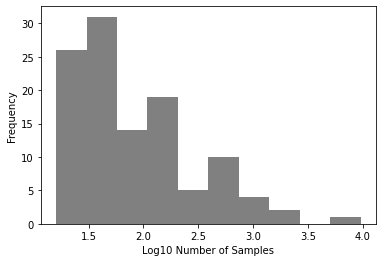

In [184]:
rdf.proposed_sublineage_size.apply(np.log10).plot(kind='hist',color='grey')
plt.xlabel("Log10 Number of Samples")

Lineage designations are generally much smaller than their parent lineage, consisting of <1% of the parent lineage's samples.

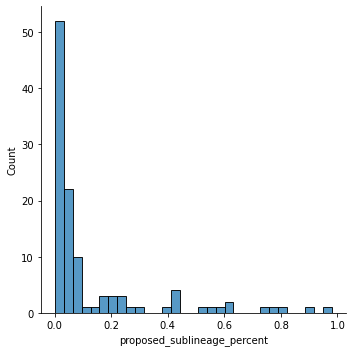

In [150]:
sns.displot(rdf.proposed_sublineage_percent)

In [151]:
rdf.child_regions.value_counts()

USA                                                                                                              32
USA,England                                                                                                       7
USA,England,United Kingdom,Scotland                                                                               3
USA,England,Scotland                                                                                              3
USA,England,Scotland,United Kingdom                                                                               2
                                                                                                                 ..
USA,Denmark,England,Scotland,Switzerland,Slovakia,Wales,United Kingdom,Northern Ireland,Liechtenstein,Austria     1
USA,Scotland,Denmark                                                                                              1
USA,Switzerland,England,Slovakia                                        

Lineage location reflects overall global sequencing biases. Half of all lineage designations are exclusive to the USA, with most of the rest split between the USA and Northern Europe. The user could place additional weight on the representation of other countries by adjusting the relative parameters in automated-lineages-prototype/config.yaml. 

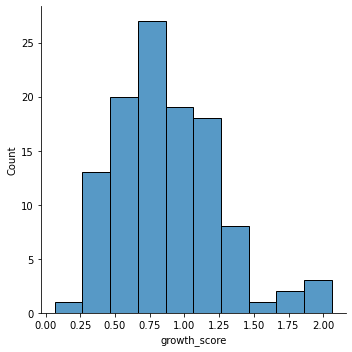

In [154]:
sns.displot(rdf.growth_score)

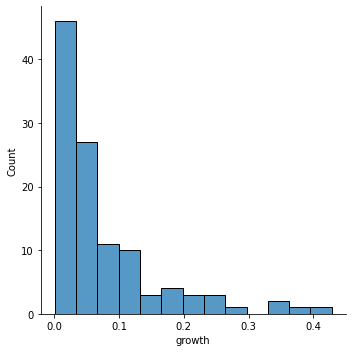

In [155]:
sns.displot(rdf.growth)

<AxesSubplot:xlabel='growth', ylabel='growth_score'>

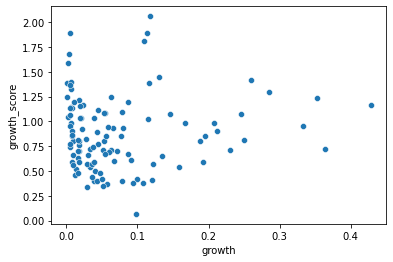

In [156]:
sns.scatterplot(x=rdf.growth,y=rdf.growth_score)

To prevent confusion, its worth noting that growth and growth_score are two distinctly evaluated metrics. Growth_score is computed per-week and is defined as the square root of the number of inclusive samples divided by the number of weeks since the earliest sample, and represents a single time snapshot estimate of the exponential growth coefficient of a given lineage. Growth, conversely, is defined over a time series of trees as the minimum periodic percentage change in exclusive samples.

Growth_score is computed only for the initial designation period in our dataset, while growth considers all available timepoints. Growth is therefore a better representation of long term performance, though growth_score may reflect an initial superspreader event or other kind of explosive early spread.